# Count of Request Type by  Diff_days

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [76]:
hub_nash=pd.read_csv('../data/hub_requests.csv')

C:\Users\arikh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
#drop unwanted columns
hub_nash=hub_nash.drop(columns= ['State Issue',
                                 'Preferred Language',
                                 'Mapped Location' ])

In [78]:
#drop N/A rows in these tow columns
hub_nash=hub_nash.dropna(subset=['Date / Time Opened','Request Type'])

In [79]:
hub_nash.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,04/28/2020 02:33:22 PM,04/28/2020 02:33:22 PM,hubNashville Community,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
1,354524,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 09:46:53 PM,04/28/2020 09:46:53 PM,Phone,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
2,354188,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 05:09:02 PM,04/28/2020 05:09:02 PM,Phone,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,354445,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 08:50:36 PM,04/28/2020 08:50:36 PM,Phone,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4,334893,Closed,Public Safety,Control Number Request for Towing,NaN,03/29/2020 01:08:55 AM,03/29/2020 01:08:55 AM,hubNashville Community,NaN,NaN,NaN,True,Long Hollow Pike & Northcreek Blvd,GOODLETTSVILLE,10.0,37072,36.32619,-86.700618


In [80]:
type(hub_nash)

pandas.core.frame.DataFrame

In [81]:
hub_nash['Council District'].value_counts()

19.0    18775
21.0    15931
6.0     14538
17.0    13453
5.0     12844
24.0    11671
7.0     11329
20.0    11319
15.0    11009
2.0     10749
25.0    10295
16.0     9881
8.0      9557
33.0     8404
23.0     7857
29.0     7856
18.0     7805
1.0      7105
26.0     6718
28.0     6256
34.0     6065
30.0     5886
9.0      5845
3.0      5765
32.0     5507
27.0     5304
13.0     5153
31.0     4894
4.0      4582
14.0     4180
11.0     3744
12.0     2863
22.0     2627
35.0     2537
10.0     2210
Name: Council District, dtype: int64

In [82]:
hub_nash.groupby(['Council District', 'Request Type'] )['Request Type'].count()

Council District  Request Type              
1.0               COVID-19                        31
                  Electric & Water General       151
                  Other                           36
                  Parks                            8
                  Permits                         21
                                                ... 
35.0              Public Safety                   52
                  Quick Requests                 103
                  Streets, Roads & Sidewalks    1653
                  Transit                         59
                  Trash, Recycling & Litter      235
Name: Request Type, Length: 463, dtype: int64

In [83]:
#hub_nash = hub_nash[["Council District", "Request Type"]]

In [102]:
#create new date column date type

hub_nash['date'] = pd.to_datetime(hub_nash['Date / Time Opened']).dt.date

In [103]:
#change the dtype for the new created date column

hub_nash['date'] = pd.to_datetime(hub_nash['date'], errors='coerce')

In [104]:
#create new date and add the date format, not preferred because this will change the dtype to str

hub_nash['date'].dt.strftime('%m/%d/%Y')

0         04/28/2020
1         04/28/2020
2         04/28/2020
3         04/28/2020
4         03/29/2020
             ...    
348666    07/26/2017
348667    07/24/2017
348668    07/17/2017
348669    07/28/2017
348670    07/20/2017
Name: date, Length: 348603, dtype: object

In [105]:
hub_nash['date'].head()

0   2020-04-28
1   2020-04-28
2   2020-04-28
3   2020-04-28
4   2020-03-29
Name: date, dtype: datetime64[ns]

In [89]:
#rename column
hub_nash=hub_nash.rename(columns={"Request Type":"RequestType"})

In [90]:
#clean_hub_nash=clean_hub_nash.groupby(['date', 'RequestType'] )['RequestType'].count()
#clean_hub_nash.head()

In [91]:
#council_hub_nash=clean_hub_nash.groupby(['date',
#                                         'RequestType'
#                                        ]).RequestType.agg('count').to_frame('count')

In [94]:
#change the date formate to date
hub_nash['Date / Time Opened']=pd.to_datetime(hub_nash['Date / Time Opened'], errors='coerce')
hub_nash['Date / Time Closed']=pd.to_datetime(hub_nash['Date / Time Closed'], errors='coerce')

In [98]:
#find the number of days between the opening and the closing time

hub_nash['diff_days'] =hub_nash['Date / Time Closed']- hub_nash['Date / Time Opened'] 

#change the format
hub_nash['diff_days']=hub_nash['diff_days']/np.timedelta64(1,'D')

In [100]:
hub_nash['diff_days'].sort_values

<bound method Series.sort_values of 0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
            ...    
348666     5.720833
348667    15.463889
348668     4.198611
348669    17.746528
348670     8.359722
Name: diff_days, Length: 348603, dtype: float64>

In [106]:
hub_nash_sub = hub_nash[["date", "RequestType", "diff_days"]]

Text(0.5, 1.0, 'Simple plot')

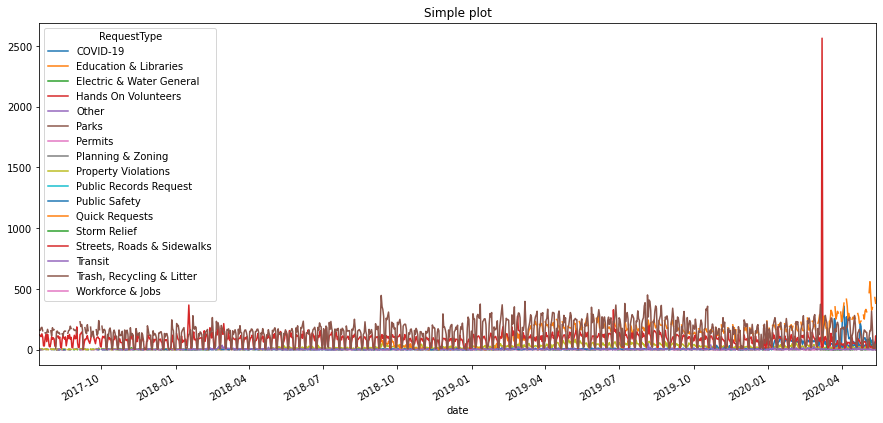

In [107]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
hub_nash_sub.groupby(['date','RequestType']).count()['diff_days'].unstack().plot(ax=ax)

ax.set_title('Simple plot')